In [1]:
import pandas as pd

import os
import glob

In [2]:
def printfiles(path, filetype):
    all_files = glob.glob(path + "/*." + filetype)
    
    for filename in all_files:
        print(os.path.basename(filename))

In [3]:
def formatCSVs(path, filetype):
    # Gets all csv files from a folder
    # For each file, adds header, confirms all columns are numeric, and removes misc. columns/rows
    
    all_files = glob.glob(path + "/*." + filetype)
    
    for filename in all_files:        
        filepath = path+os.path.basename(filename)
        
        df = pd.read_csv(filepath, skiprows = 500, delim_whitespace=True, usecols=range(9), names = ['X3', 'Y3', 'Z3', 'X2', 'Y2', 'Z2', 'X1', 'Y1', 'Z1'])                                                                                  

        df = df.dropna()
        df['X3'] = pd.to_numeric(df['X3'])
        df['Y3'] = pd.to_numeric(df['Y3'])
        
        df.to_csv(filepath, index=False)

In [4]:
folderpath = '/Users/aso/Downloads/dataCollection/Data/Asiyah\\_0910/'

formatCSVs(folderpath, 'csv')
printfiles(folderpath, 'csv')

Asiyah\_0.csv
Asiyah\_10.csv


## Check File

In [5]:
filename = 'Asiyah\_0.csv'
filepath = folderpath + filename

df = pd.read_csv(filepath)

In [6]:
df.head()

,X3,Y3,Z3,X2,Y2,Z2,X1,Y1,Z1
0,606,396,694.0,408.0,598.0,693.0,415.0,597.0,694.0
1,606,396,694.0,409.0,597.0,691.0,414.0,598.0,693.0
2,607,396,693.0,409.0,598.0,692.0,415.0,598.0,693.0
3,607,396,692.0,409.0,598.0,692.0,417.0,597.0,694.0
4,607,397,692.0,409.0,598.0,692.0,415.0,598.0,693.0


<AxesSubplot:title={'center':'D1 IMU'}>

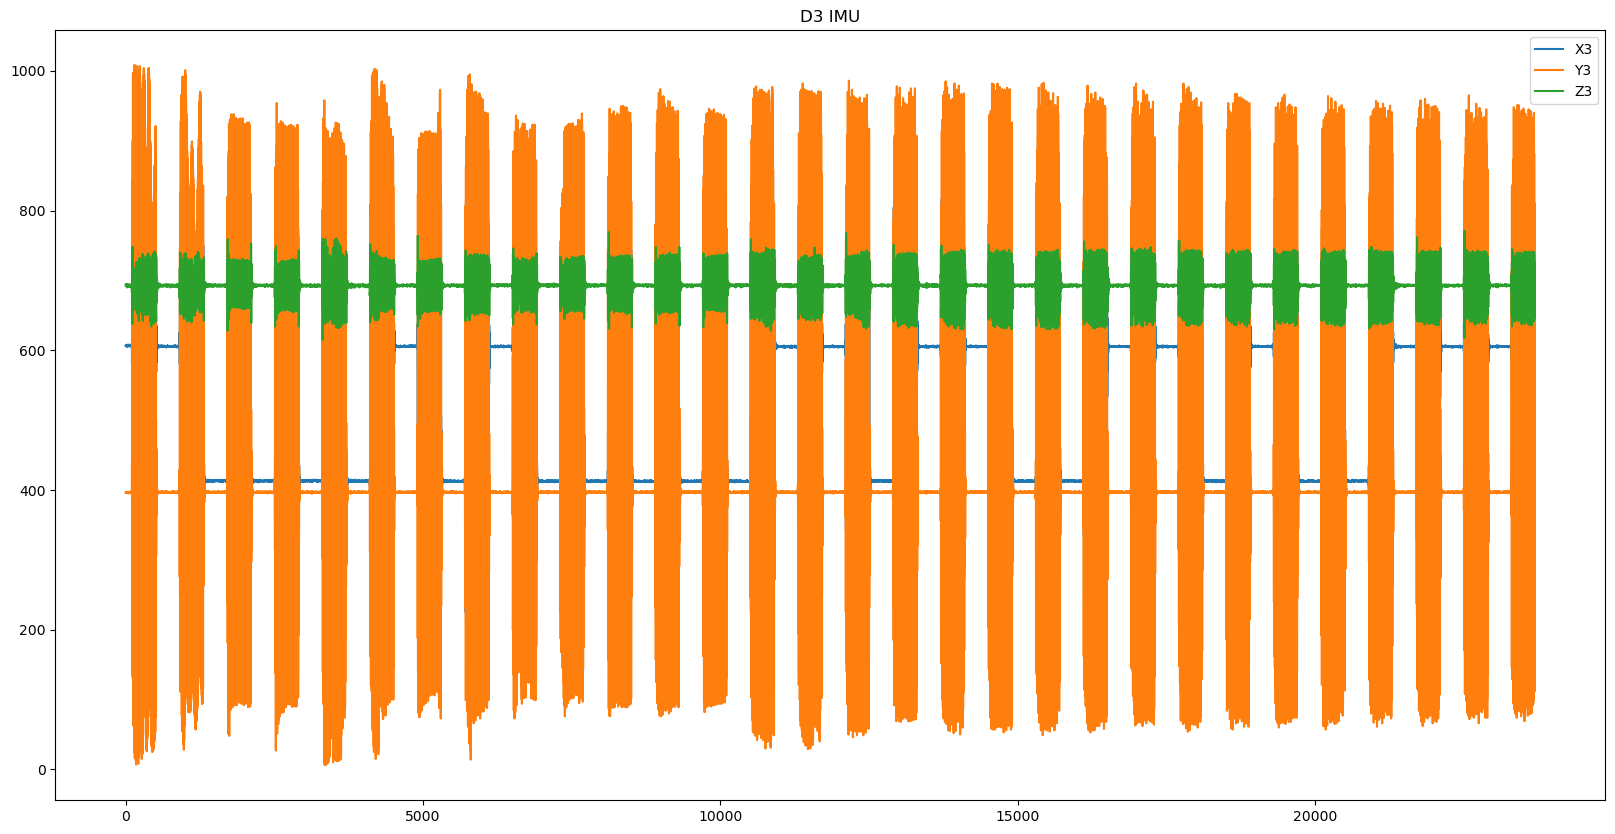

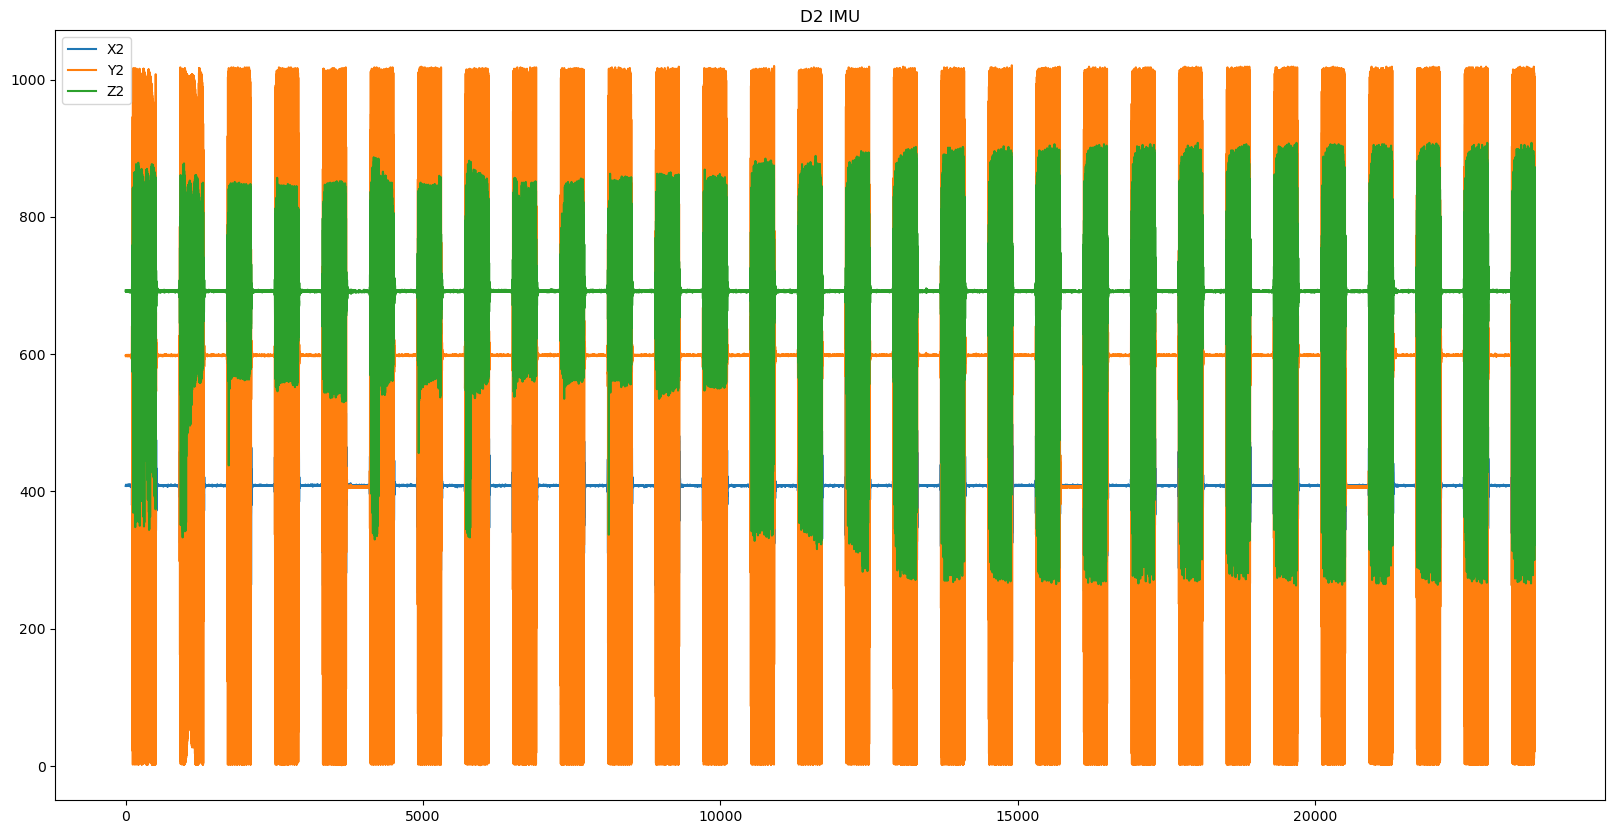

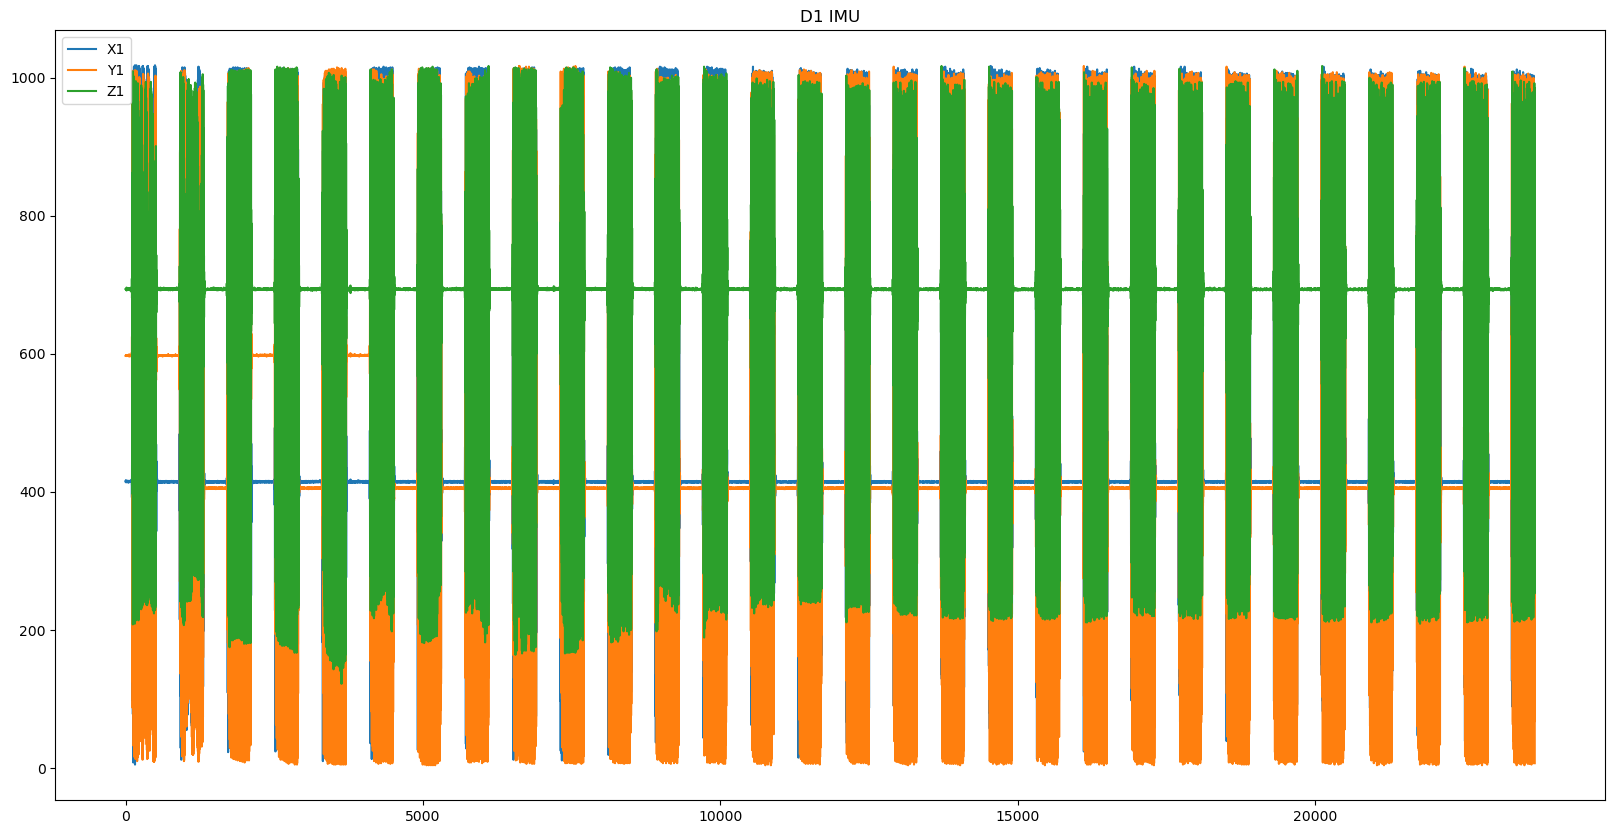

In [7]:
df.plot.line(y = df.columns[0:3], figsize=(20, 10), title='D3 IMU')
df.plot.line(y = df.columns[3:6], figsize=(20, 10), title='D2 IMU')
df.plot.line(y = df.columns[6:9], figsize=(20, 10), title='D1 IMU')